# Introduction

The dataset comprises medical information from a hundred rural African-American patients. Given that our target feature represents a continuous variable, we opt to utilize machine learning regression models to predict the Glycosolated Hemoglobin (HbA1c) scores of patients. This predictive model aims to provide valuable insights to healthcare professionals, aiding in the diagnosis of diabetes. By leveraging this information, medical practitioners can assess and ascertain whether an individual is diabetic based on the predicted HbA1c scores.

# Detailing Specialized Columns

*   chol: Cholesterol. below 200 mg/dL is considered healthy.
*   stab.glu: Stabilized Glucose. below 100 mg/dL after fasting for at least 8 hours is considered healthy.
*   hdl: High Density Lipoprotein . greater than 60 mg/dL is considered healthy.
*   ratio: Cholesterol/HDL Ratio. below 3.5:1 is considered healthy.
*   glyhb: Glycosolated Hemoglobin. below 5.7% is considered healthy.
*   bp.1s: First Systolic Blood Pressure. below 120 mmHg is considered healthy.
*   bp.1d: First Diastolic Blood Pressure. below 80 mmHg is considered healthy.
*   bp.2s: Second Systolic Blood Pressure. below 120 mmHg is considered healthy.
*   bp.2d: Second Diastolic Blood Pressure. below 80 mmHg is considered
*   time.ppn: Postprandial Time when Labs were Drawn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

# Data Collection

The dataset was acquired from Kaggle on the 9th of November 2023. An access link to this dataset has been appended to the references section at the conclusion of the project.

In [2]:
diabet_dataset = pd.read_csv('diabetes.csv')
diabet_dataset.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


Given the negligible count of missing values in the target column, I opt to eliminate all rows where the target value is absent.

In [3]:
target_null_pre =diabet_dataset['glyhb'].isnull().sum()
target_null_pre

13

In [4]:
diabet_dataset = diabet_dataset.dropna(subset = ['glyhb'])

Segmenting the dataset into train and test subsets using *sklearn.model_selection* module.

In [5]:
dia_train, dia_test = sklearn.model_selection.train_test_split(diabet_dataset)

print("Dataset shape: ", diabet_dataset.shape)
print("Train set shape: ", dia_train.shape)
print("Test set shape: ", dia_test.shape)

Dataset shape:  (390, 19)
Train set shape:  (292, 19)
Test set shape:  (98, 19)


# Data Exploration

Upon exploring the dataset, it becomes evident that the majority of features, including the target variable, are numerical.

In [6]:
dia_train.dtypes

id            int64
chol        float64
stab.glu      int64
hdl         float64
ratio       float64
glyhb       float64
location     object
age           int64
gender       object
height      float64
weight      float64
frame        object
bp.1s       float64
bp.1d       float64
bp.2s       float64
bp.2d       float64
waist       float64
hip         float64
time.ppn    float64
dtype: object

Notably, the dataset exhibits minimal outliers across its distributions.

1. **Chol:**
   - **Distribution:** Moderately right-skewed, with a notable concentration beyond the normal range (below 200 mg/dL). Few extreme values exist.
   - **Observation:** Nearly half the data surpasses the conventional healthy limit.

2. **Stab.glu:**
   - **Distribution:** Left-clustered data with a few extreme values on the right. Predominantly within the normal range (below 100 mg/dL).
   - **Observation:** Majority of data adheres to the acceptable healthy threshold.

3. **Hdl:**
   - **Distribution:** Right-skewed with outliers on the left. Median and mode suggest a risk zone (below 60 mg/dL is considered unhealthy).
   - **Observation:** Concentration of values raises concerns as it veers towards an unhealthy range.

4. **Ratio:**
   - **Distribution:** Strongly skewed to the right with outliers on the far left. Median, mode, and mean align with the risky range (below 3.5:1 is considered healthy).
   - **Observation:** Majority of values pose potential health risks based on established benchmarks.

5. **Glyhb:**
   - **Distribution:** Left-tailed graph with the median, mode, and mean aligning within the normal range (below 5.7%).
   - **Observation:** Data predominantly falls within the healthy glycemic threshold.

6. **Age:**
   - **Distribution:** Slightly right-skewed. Mode, median, and mean predominantly fall within the range of 40 to 50 years old.
   - **Observation:** Concentration of ages suggests a prevalence within the middle-aged bracket.

7. **Height:**
   - **Distribution:** Bimodal.
   - **Observation:** The data displays two distinct peaks around 65 and 70 inches, indicating the presence of two predominant height groups.

8. **Weight:**
   - **Distribution:** Moderately right-skewed. The weight data is skewed towards higher values, with the mode observed between 150 - 160 pounds. Most data lies in the lower to mid-range of the weight scale.

9. **bp.1s:**
   - **Distribution:** The distribution shows a right-skewed pattern with a significant drop in frequency after the mode at 150 mmHg.
   - **Observation:** Most data points exceed the healthy blood pressure range (below 120 mmHg), indicating a higher risk zone.

10. **bp.1d**:
   - **Distribution:** Moderate right-skewed. Although the mode lies centrally, there's a higher frequency before the mode than after.
   - **Observation:** The majority of data falls beyond the healthy diastolic blood pressure range (below 80 mmHg), indicating a higher risk zone.

11. **bp.2s:**
   - **Distribution:** The distribution is right-skewed, centered around 140-150 mmHg with an outlier on the left.
   - **Observation:** Most data points lie above the healthy range (below 120 mmHg), suggesting a higher risk zone.

12. **bp.2d:**
   - **Distribution:** The distribution is right-skewed, with the mode at 100 mmHg and a substantial amount of data below it.
   - **Observation:** All data points fall below 120 mmHg, indicating a healthier range.



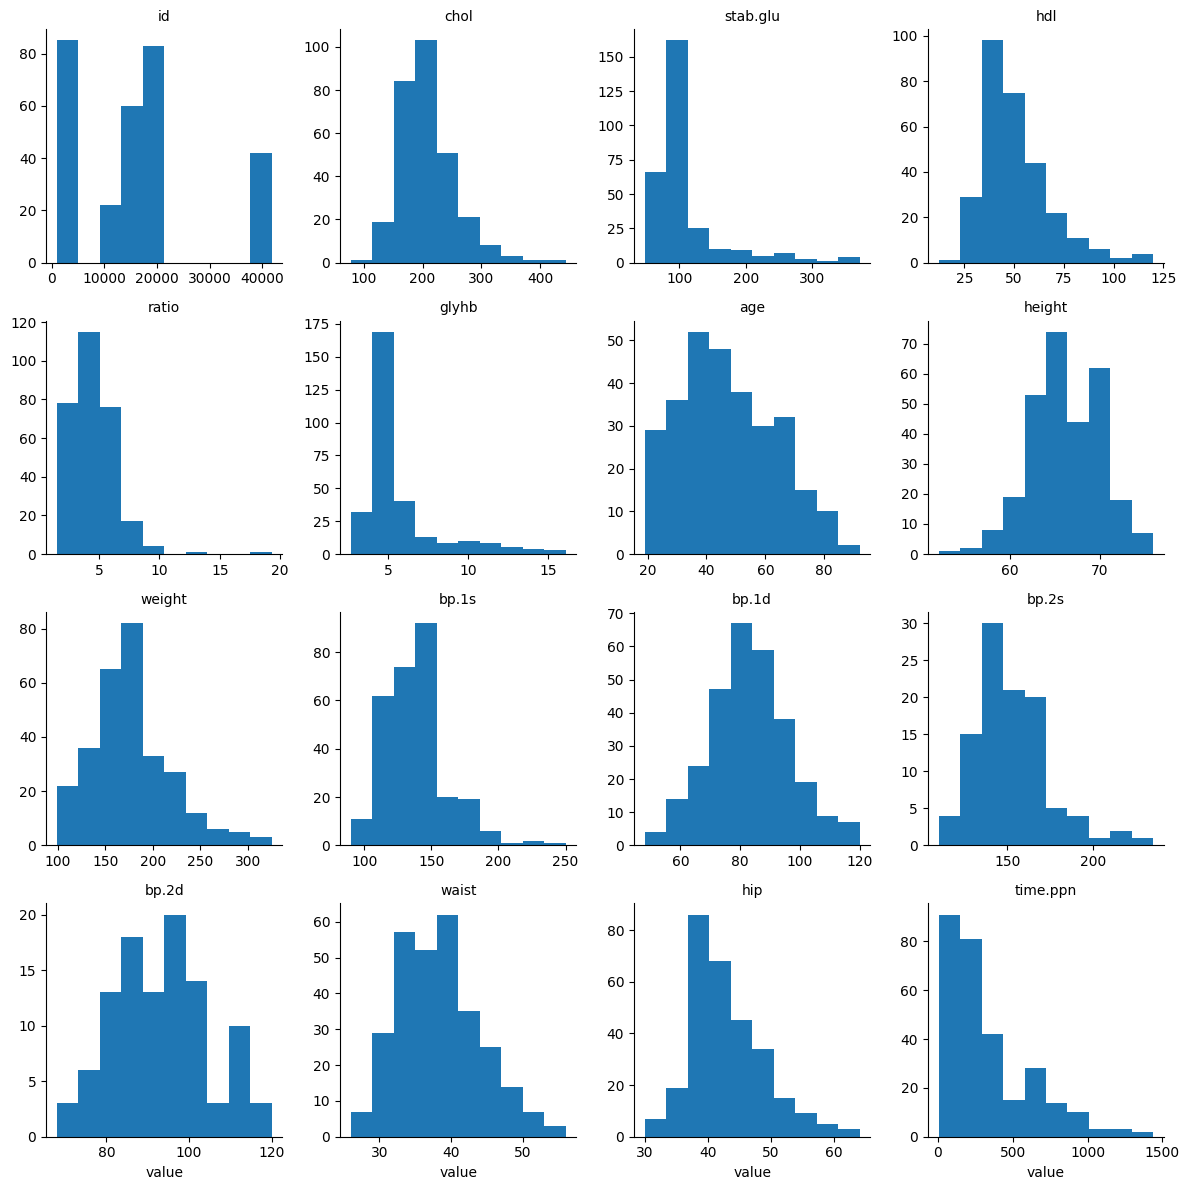

In [7]:
# Selecting only the numerical columns
numerical_columns = dia_train.select_dtypes(include=['int64', 'float64'])
# Melt the DataFrame to create a long-form version suitable for FacetGrid
melted = pd.melt(numerical_columns)
# Create FacetGrid with histograms for each numerical column
g = sns.FacetGrid(melted, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(plt.hist, "value")
# Adjust plot labels and appearance
g.set_titles("{col_name}")
plt.show()

The "Gender" column showcases moderate imbalance within its data distribution.

<Axes: >

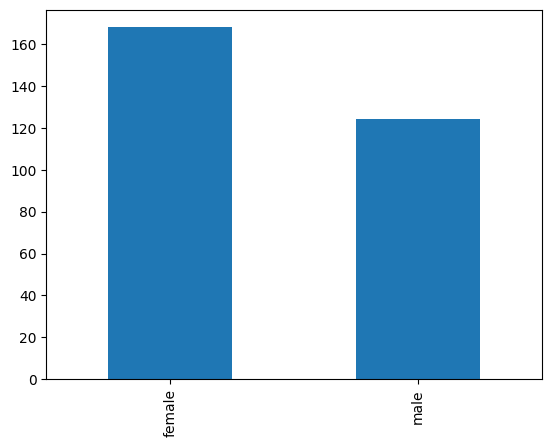

In [8]:
dia_train['gender'].value_counts().plot(kind="bar")

The variations within the "Location" column are notably limited.

In [9]:
dia_train['location'].unique()

array(['Louisa', 'Buckingham'], dtype=object)

There exists a notable proportion of missing values specifically in the "bp.2s" and "bp.2d" columns.

In [10]:
null_count_train = dia_train.isnull().sum()
print("Number of null values:", null_count_train)

Number of null values: id            0
chol          0
stab.glu      0
hdl           0
ratio         0
glyhb         0
location      0
age           0
gender        0
height        4
weight        1
frame         4
bp.1s         4
bp.1d         4
bp.2s       189
bp.2d       189
waist         1
hip           1
time.ppn      3
dtype: int64


# Preprocessing Data

Seperating the target variable from the remaining features within both the train and test sets.
The ID column is dropped since it has no meaningful relationship with other features in this project.

In [11]:
x_train = dia_train.drop(['glyhb', 'id'], axis=1)
y_train = dia_train['glyhb']

x_test = dia_test.drop(['glyhb', 'id'], axis=1)
y_test = dia_test['glyhb']

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(292, 17)
(292,)
(98, 17)
(98,)


Utilizing SimpleImputer to handle missing values within the numerical features for both the training and test sets.

In [12]:
numerical_attr_train = x_train.select_dtypes(include=['int64', 'float64'])

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train[numerical_attr_train.columns] = imp_mean.fit_transform(numerical_attr_train)
x_test[numerical_attr_train.columns] = imp_mean.transform(x_test[numerical_attr_train.columns])

# Feature Engineering

I start by splitting the dataset into two sets: one for numerical features and the other for categorical features.
Next, I standardize the numerical columns using StandardScaler to ensures that the machine learning model perform optimally, converge efficiently, maintain stability, and produce more interpretable and reliable.
Categorical columns will be transformed using One Hot Encoder, enabling us to represent categorical data in a format suitable for machine learning models.
The choice of StandardScaler is driven by its ability to maintain distribution shape, cater to diverse algorithms, and exhibit robustness against outliers, making it an optimal choice for this dataset.

In [13]:
numerical_attr = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_attr = x_train.select_dtypes(include=['object']).columns

ct = sklearn.compose.ColumnTransformer(
    [
        ('standard_scaler', sklearn.preprocessing.StandardScaler(), numerical_attr),
        ('one_hot_encoder', sklearn.preprocessing.OneHotEncoder(), categorical_attr)
    ]
)
ct.fit(x_train)

x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(292, 22)
(98, 22)


Dimension reduction isn't required as the dataset comprises only 23 features, which is relatively manageable. The data maintains balance across various features, obviates the need for additional balancing efforts, especially considering the regression nature of the problem at hand.

# Training Model

I conduct hyperparameter tuning for a Random Forest Regressor via Grid Search Cross-Validation. It defines a dictionary, `rf_parameters`, encompassing multiple hyperparameters with corresponding values to explore. Utilizing a Random Forest Regressor, the GridSearchCV configuration is set up to search for the best combination of hyperparameters across the provided grid, employing the 'r2' scoring metric and 4-fold cross-validation. Following model fitting to the training data, it retrieves and displays the best set of parameters discovered along with the corresponding best 'r2' score achieved through cross-validation, aiming to optimize the model's performance.

Continuing the approach used for the Random Forest Regressor, I'll replicate the experiment on the SVR model. Evaluating the performance of both models, I'll select the superior one to make predictions on the target variable.

Random Forest Regressor

In [14]:
rf_parameters = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [5, 10, 20, 30],
}
regr = RandomForestRegressor()

rf_clf = GridSearchCV(regr, rf_parameters, scoring='r2', cv=4)
rf_clf.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'n_estimators': [100, 300, 500, 1000]},
             scoring='r2')

In [15]:
best_params = rf_clf.best_params_
best_score = rf_clf.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Best Score: 0.5409736117014151


Support Vector Regressor

In [16]:
svr_parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
svr = SVR(kernel = 'rbf')

svr_clf = GridSearchCV(svr, svr_parameters, scoring='r2', cv=4)
svr_clf.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='r2')

In [17]:
svr_best_params = svr_clf.best_params_
svr_best_score = svr_clf.best_score_

print("Best Parameters:", svr_best_params)
print("Best Score:", svr_best_score)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.46960788704167744


# Testing

 Using the superior model (Random Forest), I employ three distinct evaluation metrics to rigorously assess the accuracy and robustness of these predictions. This holistic evaluation process aims to ensure a comprehensive understanding of the model's performance across various measurement criteria.

 However, given the notably low evaluation scores (R-squared, Mean Squared Error, Mean Absolute Percentage Error), it suggests that accurately predicting the target using the existing data and features might not be entirely feasible.

In [18]:
rf_pred = rf_clf.predict(x_test)

In [19]:
rf_r2   = r2_score(y_test, rf_pred)
print(rf_r2)

rf_mse = mean_squared_error(y_test, rf_pred, squared=False)
print(rf_mse)

rf_mape = mean_absolute_percentage_error(y_test, rf_pred)
print(rf_mape)

0.4001784578753229
1.2718692853655797
0.17313257611111935


# Conclusion

After extensive exploration into predictive analytics for forecasting glycated hemoglobin (glyhb) levels—a crucial diabetes management marker—this project undertook rigorous data preprocessing, employing advanced imputation techniques to handle missing values. The dataset underwent meticulous preparation before model development, utilizing machine learning algorithms like Random Forest Regressor and Support Vector Regressor (SVR). Despite exhaustive hyperparameter tuning and Grid Search Cross-Validation, the models' performance, as reflected in notably low evaluation scores (R-squared, Mean Squared Error, Mean Absolute Percentage Error), suggests limitations in accurately predicting glyhb levels using the available data and features.

The project's conclusion emphasizes that, despite efforts to optimize model performance and selection, the observed low evaluation metrics indicate the challenges in achieving precise glyhb predictions. This outcome underscores the complexities within diabetes management and suggests a need for further exploration and possibly additional data sources or features to enhance predictive capabilities. While acknowledging the limitations, this study highlights the potential of predictive analytics in shedding light on diabetes complexities, offering insights to guide disease management strategies, albeit with an understanding of the inherent challenges in accurate prediction using the current dataset.

# References

1. WebMD. (n.d.). How Sugar Affects Diabetes. Retrieved from [WebMD website](https://www.webmd.com/diabetes/how-sugar-affects-diabetes) (Accessed: 09.12.2023).

2. WebMD. (n.d.). HDL Cholesterol: The "Good" Cholesterol. Retrieved from [WebMD website](https://www.webmd.com/cholesterol-management/hdl-cholesterol-the-good-cholesterol)(Accessed: 09.12.2023).

3. University of Rochester Medical Center. (n.d.). HDL Cholesterol Ratio. Retrieved from [University of Rochester Medical Center website](https://www.urmc.rochester.edu/encyclopedia/content.aspx?ContentTypeID=167&ContentID=lipid_panel_hdl_ratio)(Accessed: 09.12.2023).

4. Centers for Disease Control and Prevention. (n.d.). A1C Test for Diabetes. Retrieved from [CDC website](https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html)(Accessed: 09.12.2023).

5. Centers for Disease Control and Prevention. (n.d.). About High Blood Pressure. Retrieved from [CDC website](https://www.cdc.gov/bloodpressure/about.htm)(Accessed: 09.12.2023).

6. Biostatistics: Tools for Data Analysis. (n.d.). Diabetes Dataset. Retrieved from [HBI Biostatistics website](https://hbiostat.org/data/repo/cdiabetes)(Accessed: 30.11.2023).

7. Kaggle. (n.d.). Diabetes Dataset. Retrieved from [Kaggle website](https://www.kaggle.com/datasets/imtkaggleteam/diabetes)(Accessed: 30.11.2023).

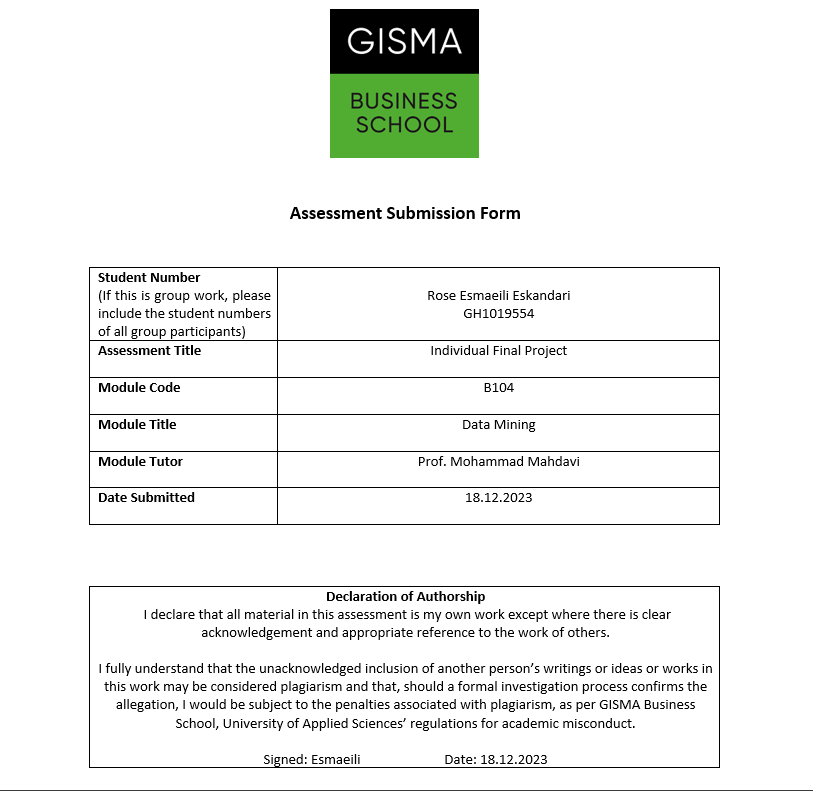